In [1]:
#packs
import pandas as pd
import requests
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import googlefinance.client 

In [39]:
#loop

port = ['UGPA3.SA', 'EMBR3.SA', 'SCAR3.SA', 'ECOR3.SA', 'LEVE3.SA', 'SSBR3.SA', 'BPAN4.SA', 'POMO4.SA', 'BRPR3.SA','CSAN3.SA',
        'CGAS5.SA', 'TRPN3.SA', 'BRFS3.SA', 'ALPA4.SA', 'RAPT4.SA', 'UCAS3.SA', 'PETR4.SA','VLID3.SA']

start = '2015-01-01'
end = '2018-11-01'

betas = pd.DataFrame()

for stock in port:
    #concat data
    df = web.DataReader(stock, 'yahoo', start, end)
    df = pd.concat([df['Close'], bova['Close']], axis = 1)
    df.columns = ['stock', 'IBOV ' + stock]
    
    #daily_return
    df_return = df.pct_change(1)
    df_return_clean = df_return.dropna(axis = 0)
    
    #split 
    X = df_return_clean['IBOV ' + stock]
    Y = df_return_clean['stock']

    #constant
    A = sm.add_constant(X)
    
    #model
    model = sm.OLS(Y, A).fit()
    
    betas = betas.append(model.params, ignore_index = True)
    
print(betas)   

    IBOV UGPA3.SA     const  IBOV EMBR3.SA  IBOV SCAR3.SA  IBOV ECOR3.SA  \
0         0.65047 -0.000471            NaN            NaN            NaN   
1             NaN -0.000163       0.350066            NaN            NaN   
2             NaN -0.000117            NaN       0.371732            NaN   
3             NaN -0.000537            NaN            NaN       1.063651   
4             NaN -0.000008            NaN            NaN            NaN   
5             NaN  0.000206            NaN            NaN            NaN   
6             NaN -0.000224            NaN            NaN            NaN   
7             NaN  0.000125            NaN            NaN            NaN   
8             NaN -0.000328            NaN            NaN            NaN   
9             NaN -0.000193            NaN            NaN            NaN   
10            NaN  0.000196            NaN            NaN            NaN   
11            NaN -0.001315            NaN            NaN            NaN   
12          

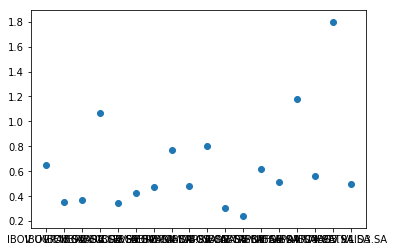

In [90]:
###plot

#adjusted
beta = betas.transpose()
beta = beta.drop(beta.index[1]).reset_index().fillna(0)

beta['beta'] = beta.iloc[:,1:len(port) + 1].sum() 
beta.drop(beta.columns[1:19], axis = 1, inplace = True)

#plot
plt.scatter(beta['index'], beta['beta'])
